### Imports

In [ ]:
# !pip install matplotlib==3.5.0 

In [2]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import time
from typing import List
import random as rnd
import matplotlib
import json
import re
from mpl_toolkits.mplot3d import Axes3D
# from scipy import interpolate

### Global Constants

In [3]:
agent_num = 2000
search_iteration = 500
landscape_repetitions = 200

### Data Ingestion

In [4]:
n8k0_results = {}
n8k3_results = {}
n8k7_results = {}

n12k0_results = {}
n12k5_results = {}
n12k11_results = {}


## When running locally or elsewhere, replace the file path(s) with the correct path(s)
with open('/content/prioritisation_N12K0_results.json') as json_file:
    n12k0_results = json.load(json_file)
with open('/content/prioritisation_N12K5_results.json') as json_file:
    n12k5_results = json.load(json_file)
with open('/content/prioritisation_N12K11_results.json') as json_file:
    n12k11_results = json.load(json_file)

with open('/content/prioritisation_N8K0_results.json') as json_file:
    n8k0_results = json.load(json_file)
with open('/content/prioritisation_N8K3_results.json') as json_file:
    n8k3_results = json.load(json_file)
with open('/content/prioritisation_N8K7_results.json') as json_file:
    n8k7_results = json.load(json_file)

### N8

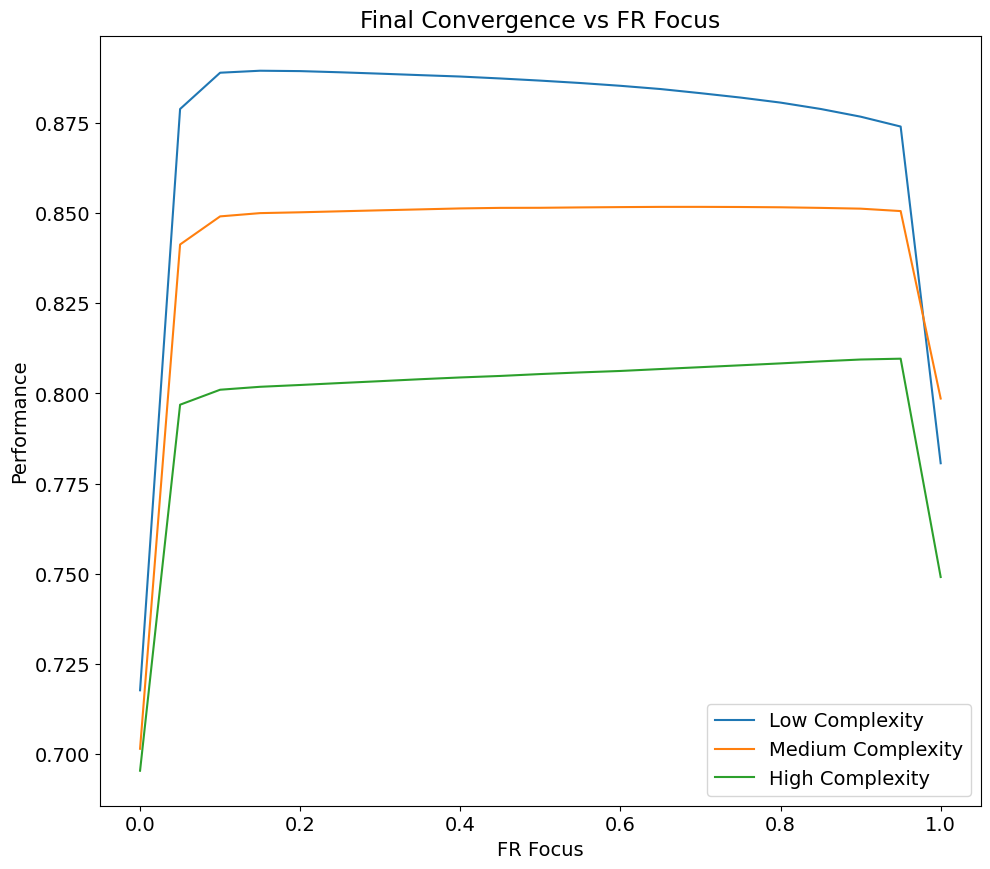

In [5]:
"""Max Fitness Score"""
font = {'size': 14}
matplotlib.rc('font', **font)

labels = [i/100 for i in range(0, 105, 5)]
plt.subplots(figsize=(25, 10))

plt.subplot(1, 2, 1)
max_perfomance_together_n8k0 = [] 
max_perfomance_together_n8k3 = []
max_perfomance_together_n8k7 = []
for name, vals in n8k0_results.items():
    max_perfomance_together_n8k0.append(vals[-1])
for name, vals in n8k3_results.items():
    max_perfomance_together_n8k3.append(vals[-1])
for name, vals in n8k7_results.items():
    max_perfomance_together_n8k7.append(vals[-1])

plt.plot(labels, max_perfomance_together_n8k0, label=f"Low Complexity")
plt.plot(labels, max_perfomance_together_n8k3, label=f"Medium Complexity")
plt.plot(labels, max_perfomance_together_n8k7, label=f"High Complexity")

# ## If we want to smoothen the line, uncomment the below 
# x_new, bspline, y_new
# x_new_n8k0 = np.linspace(0, 1, 10000)
# bspline_n8k0 = interpolate.make_interp_spline(labels, max_perfomance_together_n8k0)
# y_new_n8k0 = bspline_n8k0(x_new_n8k0)
# # Plot the new data points
# plt.plot(x_new_n8k0, y_new_n8k0, label=f"N8K0")

# # x_new, bspline, y_new
# x_new_k5 = np.linspace(0, 1, 10000)
# bspline_k5 = interpolate.make_interp_spline(labels, max_perfomance_together_k5)
# y_new_k5 = bspline_k5(x_new_k5)
# # Plot the new data points
# plt.plot(x_new_k5, y_new_k5, label=f"K5")

# # x_new, bspline, y_new
# x_new_k11 = np.linspace(0, 1, 10000)
# bspline_k11 = interpolate.make_interp_spline(labels, max_perfomance_together_k11)
# y_new_k11 = bspline_k11(x_new_k11)
# # Plot the new data points
# plt.plot(x_new_k11, y_new_k11, label=f"K11")

plt.legend()
plt.ylabel("Performance")
plt.xlabel("FR Focus")
plt.title("Final Convergence vs FR Focus")
plt.show()

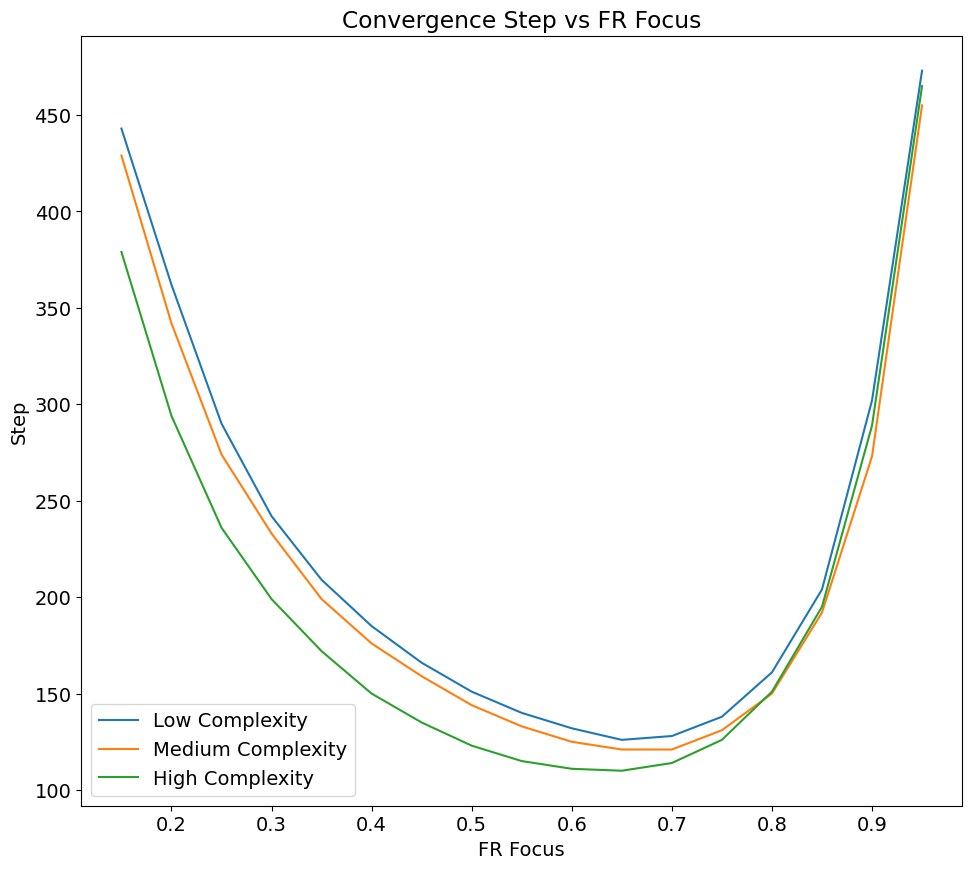

In [6]:
## Check time of convergence
font = {'size': 14}
matplotlib.rc('font', **font)

difference_to_accept = 0.0001
labels = [i/100 for i in range(0, 105, 5)]
plt.subplots(figsize=(25, 10))

## Comment out to include all data points
labels = [i/100 for i in range(15, 100, 5)]

plt.subplot(1, 2, 1)
convergence_step_n8k0 = [] 
convergence_step_n8k3 = []
convergence_step_n8k7 = []
for name, vals in n8k0_results.items():
    if re.findall('[0-9]+', name)[0] not in [str(int(i*100)) for i in labels]:
        continue
    max_val = vals[-1]
    convergence_step = 0
    for i in range(search_iteration-2, -1, -1):
        if (max_val - vals[i]) >= difference_to_accept:
            convergence_step = i
            break
    convergence_step_n8k0.append(convergence_step)
for name, vals in n8k3_results.items():
    if re.findall('[0-9]+', name)[0] not in [str(int(i*100)) for i in labels]:
        continue
    max_val = vals[-1]
    convergence_step = 0
    for i in range(search_iteration-2, -1, -1):
        if (max_val - vals[i]) >= difference_to_accept:
            convergence_step = i
            break
    convergence_step_n8k3.append(convergence_step)
for name, vals in n8k7_results.items():
    if re.findall('[0-9]+', name)[0] not in [str(int(i*100)) for i in labels]:
        continue
    max_val = vals[-1]
    convergence_step = 0
    for i in range(search_iteration-2, -1, -1):
        if (max_val - vals[i]) >= difference_to_accept:
            convergence_step = i
            break
    convergence_step_n8k7.append(convergence_step)

plt.plot(labels, convergence_step_n8k0, label=f"Low Complexity")
plt.plot(labels, convergence_step_n8k3, label=f"Medium Complexity")
plt.plot(labels, convergence_step_n8k7, label=f"High Complexity")

# ## Do interpolation to smooth the curve
# # x_new, bspline, y_new
# x_new_k0 = np.linspace(labels[0], labels[-1], 1000)
# bspline_k0 = interpolate.make_interp_spline(labels, convergence_step_k0, k=3)
# y_new_k0 = bspline_k0(x_new_k0)
# # Plot the new data points
# plt.plot(x_new_k0, y_new_k0, label=f"K0")

# # x_new, bspline, y_new
# x_new_k5 = np.linspace(labels[0], labels[-1], 1000)
# bspline_k5 = interpolate.make_interp_spline(labels, convergence_step_k5)
# y_new_k5 = bspline_k5(x_new_k5)
# # Plot the new data points
# plt.plot(x_new_k5, y_new_k5, label=f"K5")

# # x_new, bspline, y_new
# x_new_k11 = np.linspace(labels[0], labels[-1], 1000)
# bspline_k11 = interpolate.make_interp_spline(labels, convergence_step_k11)
# y_new_k11 = bspline_k11(x_new_k11)
# # Plot the new data points
# plt.plot(x_new_k11, y_new_k11, label=f"K11")

plt.legend()
plt.ylabel("Step")
plt.xlabel("FR Focus")
plt.title("Convergence Step vs FR Focus")
plt.show()

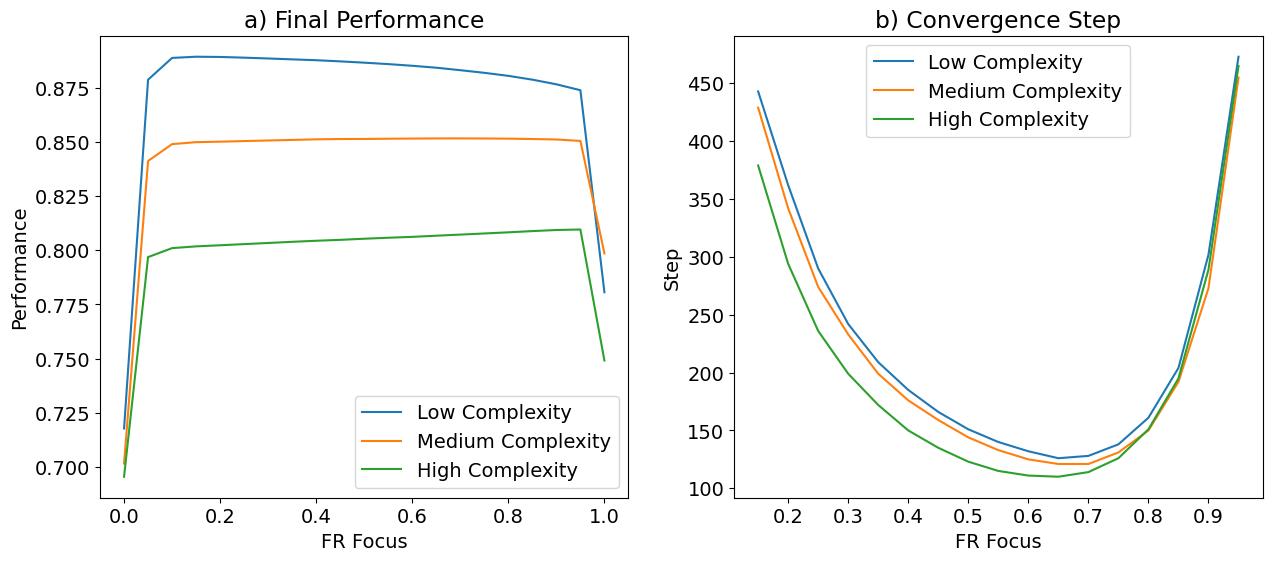

In [7]:
## Combine the above two plots
plt.subplots(figsize=(15, 6))
font = {'size': 14}
matplotlib.rc('font', **font)

plt.subplot(1, 2, 1)
labels = [i/100 for i in range(0, 105, 5)]
plt.plot(labels, max_perfomance_together_n8k0, label=f"Low Complexity")
plt.plot(labels, max_perfomance_together_n8k3, label=f"Medium Complexity")
plt.plot(labels, max_perfomance_together_n8k7, label=f"High Complexity")
plt.legend()
plt.ylabel("Performance")
plt.xlabel("FR Focus")
plt.title("a) Final Performance")

plt.subplot(1, 2, 2)
labels = [i/100 for i in range(15, 100, 5)]
plt.plot(labels, convergence_step_n8k0, label=f"Low Complexity")
plt.plot(labels, convergence_step_n8k3, label=f"Medium Complexity")
plt.plot(labels, convergence_step_n8k7, label=f"High Complexity")
plt.legend()
plt.ylabel("Step")
plt.xlabel("FR Focus")
plt.title("b) Convergence Step")

plt.show()

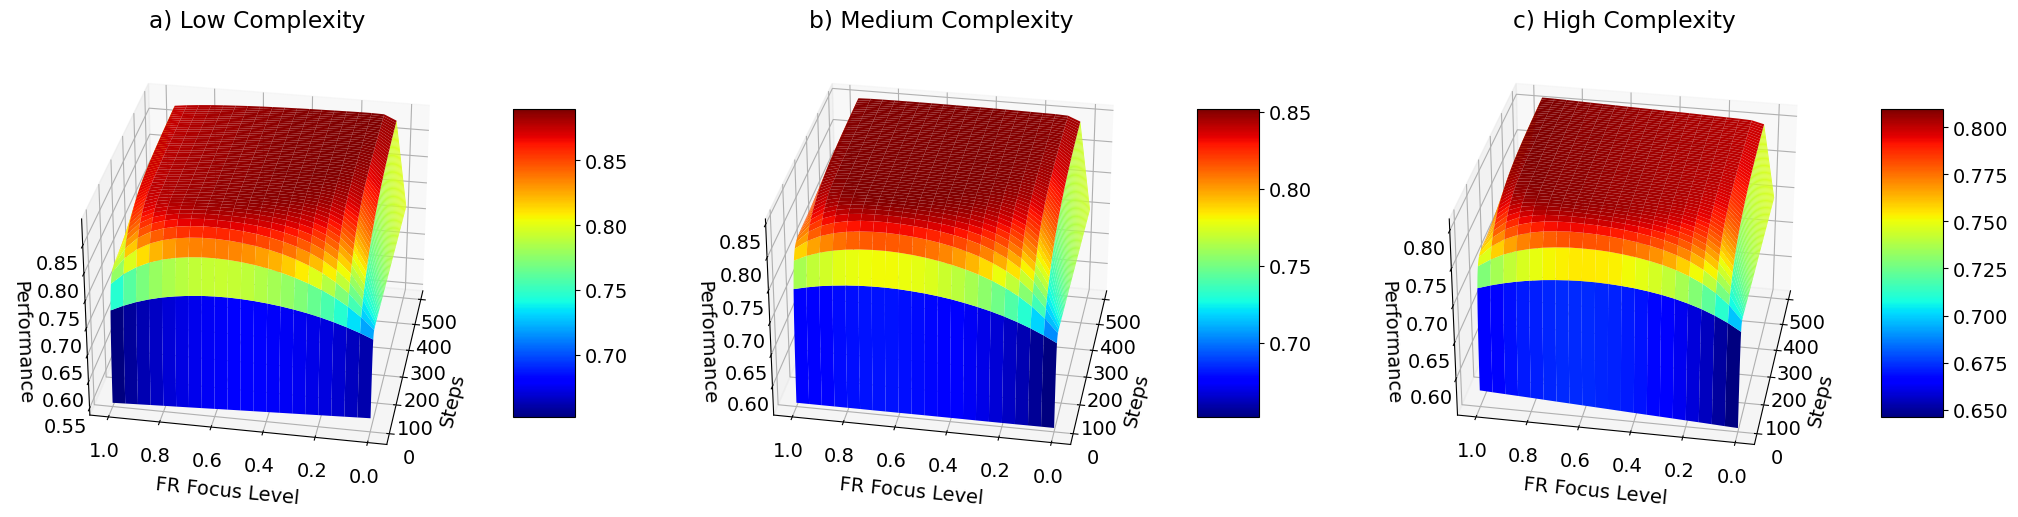

In [8]:
font = {'size': 14}
matplotlib.rc('font', **font)

# Initialize a 3D axes object
fig = plt.figure(figsize=(25, 10))

"""n8K0 Plot"""
ax = fig.add_subplot(131, projection='3d')
#ax.tick_params(axis='both', which='major', pad=20)
# Define the x-coordinates
x = range(search_iteration)
# Define the y-coordinates and z-coordinates for each line
zs = []
ys = []
for name, vals in n8k0_results.items():
    zs.append(vals)
    ys.append([int(re.findall('[0-9]+', name)[0])/100]*len(x))
# Convert lists to arrays for plotting
ys = np.array(ys)
zs = np.array(zs)
# Create meshgrid of x, y, and z coordinates
X, Y = np.meshgrid(x, [int(re.findall('[0-9]+', i)[0])/100 for i in n8k0_results.keys()])
Z = zs
# Create surface plot
surf = ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none')

# Set labels and title
ax.set_xlabel('Steps', labelpad = 8)
ax.set_ylabel('FR Focus Level', labelpad = 8)
ax.set_zlabel('Performance', labelpad = 8)
ax.set_title('a) Low Complexity')
# Add color bar
fig.colorbar(surf, shrink=0.4, aspect=5)
# Set the view angle
ax.view_init(elev=30, azim=190)

"""n8k3 Plot"""
ax = fig.add_subplot(132, projection='3d')
# Define the x-coordinates
x = range(search_iteration)
# Define the y-coordinates and z-coordinates for each line
zs = []
ys = []
for name, vals in n8k3_results.items():
    zs.append(vals)
    ys.append([int(re.findall('[0-9]+', name)[0])/100]*len(x))
# Convert lists to arrays for plotting
ys = np.array(ys)
zs = np.array(zs)
# Create meshgrid of x, y, and z coordinates
X, Y = np.meshgrid(x, [int(re.findall('[0-9]+', i)[0])/100 for i in n8k3_results.keys()])
Z = zs
# Create surface plot
surf = ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none')

# Set labels and title
ax.set_xlabel('Steps', labelpad=8)
ax.set_ylabel('FR Focus Level', labelpad=8)
ax.set_zlabel('Performance', labelpad=8)
ax.set_title('b) Medium Complexity')
# Add color bar
fig.colorbar(surf, shrink=0.4, aspect=5)
# Set the view angle
ax.view_init(elev=30, azim=190)

"""n8k7 Plot"""
ax = fig.add_subplot(133, projection='3d')
# Define the x-coordinates
x = range(search_iteration)
# Define the y-coordinates and z-coordinates for each line
zs = []
ys = []
for name, vals in n8k7_results.items():
    zs.append(vals)
    ys.append([int(re.findall('[0-9]+', name)[0])/100]*len(x))
# Convert lists to arrays for plotting
ys = np.array(ys)
zs = np.array(zs)
# Create meshgrid of x, y, and z coordinates
X, Y = np.meshgrid(x, [int(re.findall('[0-9]+', i)[0])/100 for i in n8k7_results.keys()])
Z = zs
# Create surface plot
surf = ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none')

# Set labels and title
ax.set_xlabel('Steps', labelpad=8)
ax.set_ylabel('FR Focus Level', labelpad=8)
ax.set_zlabel('Performance', labelpad=8)
ax.set_title('c) High Complexity')
# Add color bar
fig.colorbar(surf, shrink=0.4, aspect=5)
# Set the view angle
ax.view_init(elev=30, azim=190)

# Show the plot
plt.show()

### N12

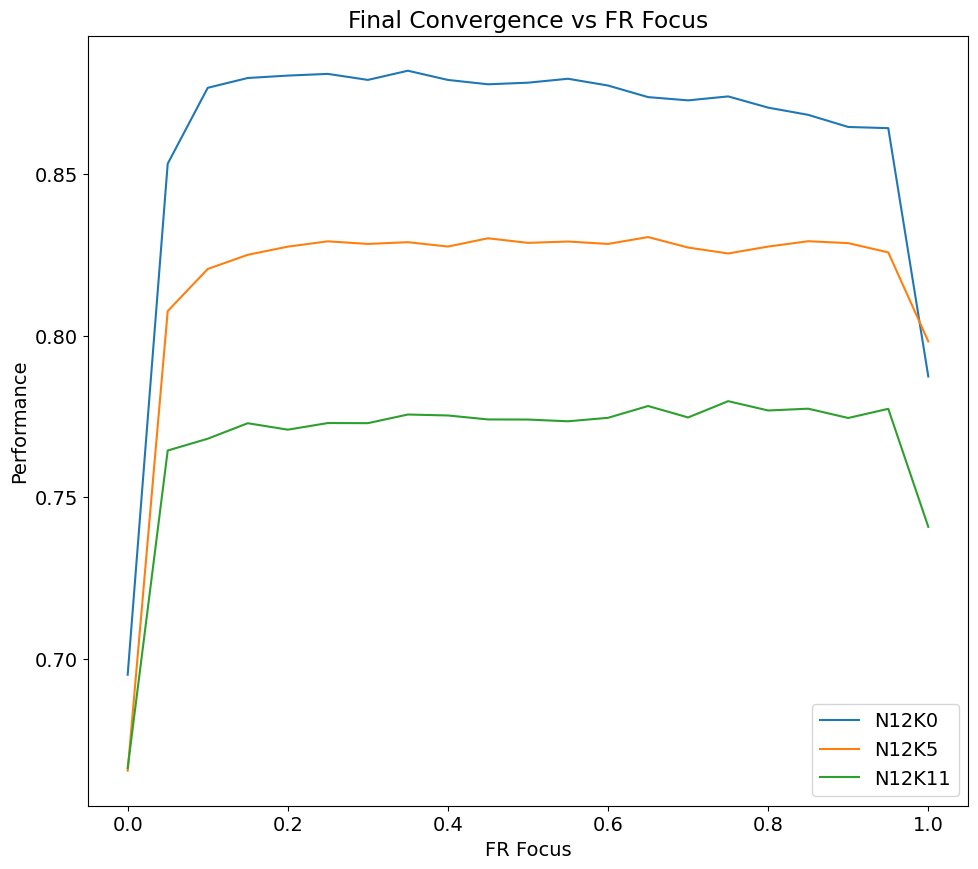

In [9]:
"""Max Fitness Score"""
font = {'size': 14}
matplotlib.rc('font', **font)

labels = [i/100 for i in range(0, 105, 5)]
plt.subplots(figsize=(25, 10))

plt.subplot(1, 2, 1)
max_perfomance_together_n12k0 = [] 
max_perfomance_together_n12k5 = []
max_perfomance_together_n12k11 = []
for name, vals in n12k0_results.items():
    max_perfomance_together_n12k0.append(vals[-1])
for name, vals in n12k5_results.items():
    max_perfomance_together_n12k5.append(vals[-1])
for name, vals in n12k11_results.items():
    max_perfomance_together_n12k11.append(vals[-1])

plt.plot(labels, max_perfomance_together_n12k0, label=f"N12K0")
plt.plot(labels, max_perfomance_together_n12k5, label=f"N12K5")
plt.plot(labels, max_perfomance_together_n12k11, label=f"N12K11")


plt.legend()
plt.ylabel("Performance")
plt.xlabel("FR Focus")
plt.title("Final Convergence vs FR Focus")
plt.show()

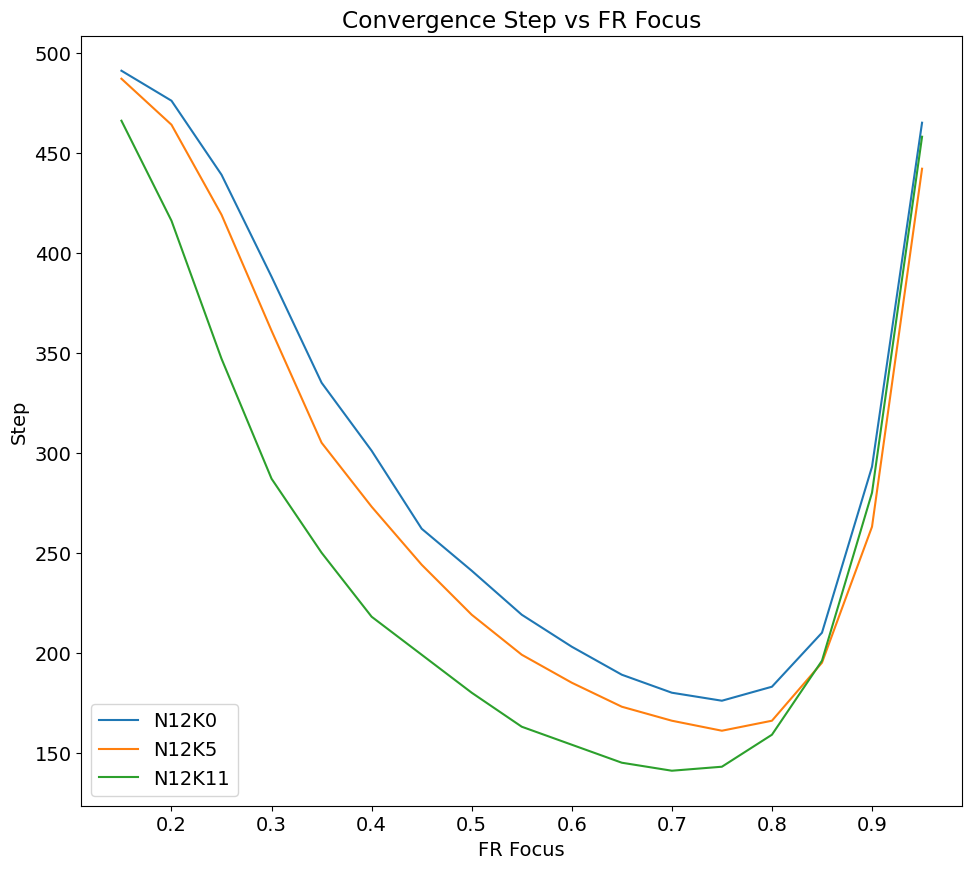

In [10]:
## Check time of convergence

font = {'size': 14}
matplotlib.rc('font', **font)

difference_to_accept = 0.0001
labels = [i/100 for i in range(0, 105, 5)]
plt.subplots(figsize=(25, 10))

## Comment out to include all data points
labels = [i/100 for i in range(15, 100, 5)]

plt.subplot(1, 2, 1)
convergence_step_n12k0 = [] 
convergence_step_n12k5 = []
convergence_step_n12k11 = []
for name, vals in n12k0_results.items():
    if re.findall('[0-9]+', name)[0] not in [str(int(i*100)) for i in labels]:
        continue
    max_val = vals[-1]
    convergence_step = 0
    for i in range(search_iteration-2, -1, -1):
        if (max_val - vals[i]) >= difference_to_accept:
            convergence_step = i
            break
    convergence_step_n12k0.append(convergence_step)
for name, vals in n12k5_results.items():
    if re.findall('[0-9]+', name)[0] not in [str(int(i*100)) for i in labels]:
        continue
    max_val = vals[-1]
    convergence_step = 0
    for i in range(search_iteration-2, -1, -1):
        if (max_val - vals[i]) >= difference_to_accept:
            convergence_step = i
            break
    convergence_step_n12k5.append(convergence_step)
for name, vals in n12k11_results.items():
    if re.findall('[0-9]+', name)[0] not in [str(int(i*100)) for i in labels]:
        continue
    max_val = vals[-1]
    convergence_step = 0
    for i in range(search_iteration-2, -1, -1):
        if (max_val - vals[i]) >= difference_to_accept:
            convergence_step = i
            break
    convergence_step_n12k11.append(convergence_step)

plt.plot(labels, convergence_step_n12k0, label=f"N12K0")
plt.plot(labels, convergence_step_n12k5, label=f"N12K5")
plt.plot(labels, convergence_step_n12k11, label=f"N12K11")


plt.legend()
plt.ylabel("Step")
plt.xlabel("FR Focus")
plt.title("Convergence Step vs FR Focus")
plt.show()

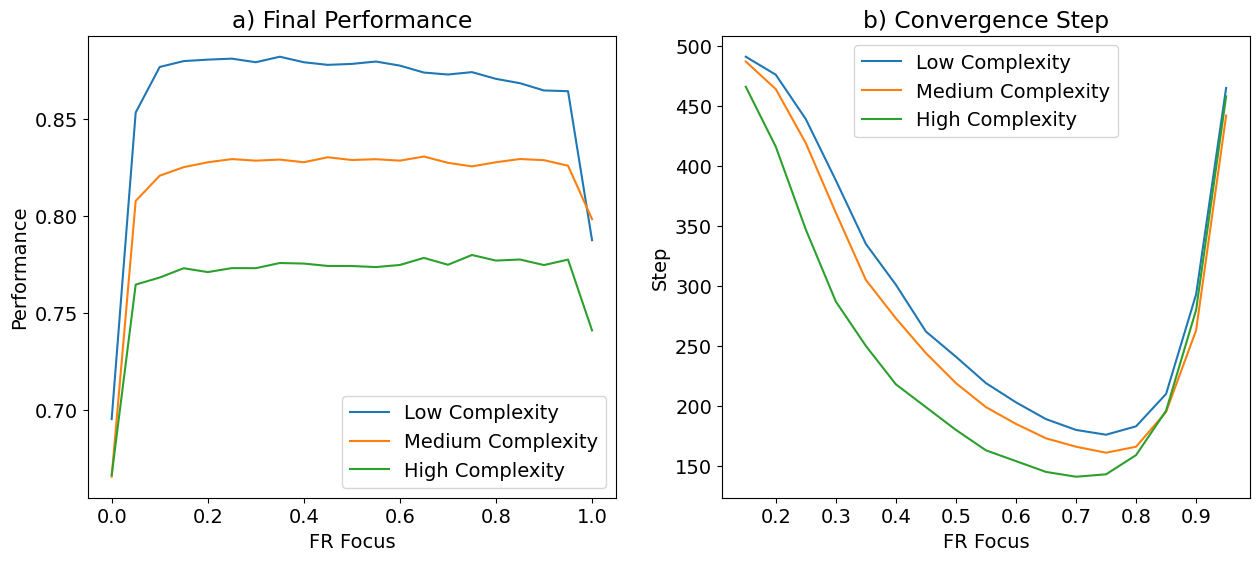

In [11]:
## combine the above two plots
plt.subplots(figsize=(15, 6))
font = {'size': 14}
matplotlib.rc('font', **font)

plt.subplot(1, 2, 1)
labels = [i/100 for i in range(0, 105, 5)]
plt.plot(labels, max_perfomance_together_n12k0, label=f"Low Complexity")
plt.plot(labels, max_perfomance_together_n12k5, label=f"Medium Complexity")
plt.plot(labels, max_perfomance_together_n12k11, label=f"High Complexity")
plt.legend()
plt.ylabel("Performance")
plt.xlabel("FR Focus")
plt.title("a) Final Performance")

plt.subplot(1, 2, 2)
labels = [i/100 for i in range(15, 100, 5)]
plt.plot(labels, convergence_step_n12k0, label=f"Low Complexity")
plt.plot(labels, convergence_step_n12k5, label=f"Medium Complexity")
plt.plot(labels, convergence_step_n12k11, label=f"High Complexity")
plt.legend()
plt.ylabel("Step")
plt.xlabel("FR Focus")
plt.title("b) Convergence Step")

plt.show()

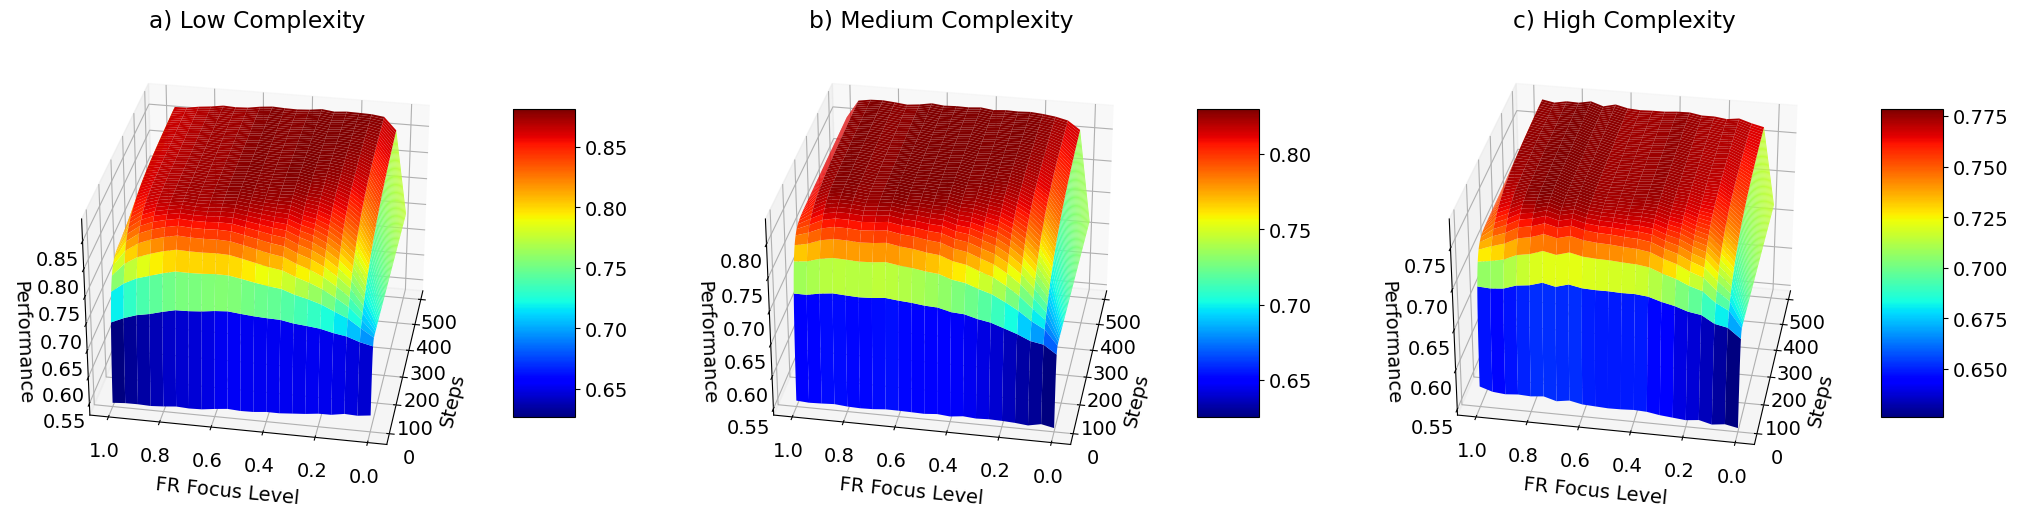

In [12]:
font = {'size': 14}
matplotlib.rc('font', **font)


# Initialize a 3D axes object
fig = plt.figure(figsize=(25, 10))

"""n12K0 Plot"""
ax = fig.add_subplot(131, projection='3d')
#ax.tick_params(axis='both', which='major', pad=20)
# Define the x-coordinates
x = range(search_iteration)
# Define the y-coordinates and z-coordinates for each line
zs = []
ys = []
for name, vals in n12k0_results.items():
    zs.append(vals)
    ys.append([int(re.findall('[0-9]+', name)[0])/100]*len(x))
# Convert lists to arrays for plotting
ys = np.array(ys)
zs = np.array(zs)
# Create meshgrid of x, y, and z coordinates
X, Y = np.meshgrid(x, [int(re.findall('[0-9]+', i)[0])/100 for i in n12k0_results.keys()])
Z = zs
# Create surface plot
surf = ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none')

# Set labels and title
ax.set_xlabel('Steps', labelpad = 8)
ax.set_ylabel('FR Focus Level', labelpad = 8)
ax.set_zlabel('Performance', labelpad = 8)
ax.set_title('a) Low Complexity')
# Add color bar
fig.colorbar(surf, shrink=0.4, aspect=5)
# Set the view angle
ax.view_init(elev=30, azim=190)

"""n12k5 Plot"""
ax = fig.add_subplot(132, projection='3d')
# Define the x-coordinates
x = range(search_iteration)
# Define the y-coordinates and z-coordinates for each line
zs = []
ys = []
for name, vals in n12k5_results.items():
    zs.append(vals)
    ys.append([int(re.findall('[0-9]+', name)[0])/100]*len(x))
# Convert lists to arrays for plotting
ys = np.array(ys)
zs = np.array(zs)
# Create meshgrid of x, y, and z coordinates
X, Y = np.meshgrid(x, [int(re.findall('[0-9]+', i)[0])/100 for i in n12k5_results.keys()])
Z = zs
# Create surface plot
surf = ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none')

# Set labels and title
ax.set_xlabel('Steps', labelpad=8)
ax.set_ylabel('FR Focus Level', labelpad=8)
ax.set_zlabel('Performance', labelpad=8)
ax.set_title('b) Medium Complexity')
# Add color bar
fig.colorbar(surf, shrink=0.4, aspect=5)
# Set the view angle
ax.view_init(elev=30, azim=190)

"""n12k11 Plot"""
ax = fig.add_subplot(133, projection='3d')
# Define the x-coordinates
x = range(search_iteration)
# Define the y-coordinates and z-coordinates for each line
zs = []
ys = []
for name, vals in n12k11_results.items():
    zs.append(vals)
    ys.append([int(re.findall('[0-9]+', name)[0])/100]*len(x))
# Convert lists to arrays for plotting
ys = np.array(ys)
zs = np.array(zs)
# Create meshgrid of x, y, and z coordinates
X, Y = np.meshgrid(x, [int(re.findall('[0-9]+', i)[0])/100 for i in n12k11_results.keys()])
Z = zs
# Create surface plot
surf = ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none')

# Set labels and title
ax.set_xlabel('Steps', labelpad=8)
ax.set_ylabel('FR Focus Level', labelpad=8)
ax.set_zlabel('Performance', labelpad=8)
ax.set_title('c) High Complexity')
# Add color bar
fig.colorbar(surf, shrink=0.4, aspect=5)
# Set the view angle
ax.view_init(elev=30, azim=190)

# Show the plot
plt.show()